<a href="https://colab.research.google.com/github/shubham2721/Data-Analysis-With-Python/blob/main/GDP_and_POPULATION(Star_Schema_Creation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import opendatasets as od
import urllib.request as ur
import requests

In [ ]:
url = 'https://www.imf.org/en/Publications/WEO/weo-database/2021/April/weo-report?c=512,914,612,614,311,213,911,314,193,122,912,313,419,513,316,913,124,339,638,514,218,963,616,223,516,918,748,618,624,522,622,156,626,628,228,924,233,632,636,634,238,662,960,423,935,128,611,321,243,248,469,253,642,643,939,734,644,819,172,132,646,648,915,134,652,174,328,258,656,654,336,263,268,532,944,176,534,536,429,433,178,436,136,343,158,439,916,664,826,542,967,443,917,544,941,446,666,668,672,946,137,546,674,676,548,556,678,181,867,682,684,273,868,921,948,943,686,688,518,728,836,558,138,196,278,692,694,962,142,449,564,565,283,853,288,293,566,964,182,359,453,968,922,714,862,135,716,456,722,942,718,724,576,936,961,813,726,199,733,184,524,361,362,364,732,366,144,146,463,528,923,738,578,537,742,866,369,744,186,925,869,746,926,466,112,111,298,927,846,299,582,487,474,754,698,&s=NGDPD,&sy=2014&ey=2021&ssm=0&scsm=1&scc=0&ssd=1&ssc=0&sic=0&sort=country&ds=.&br=1'
html = requests.get(url).content
df_list = pd.read_html(html)
df = df_list[-1]

In [ ]:
# you can also convert the 3d array into 2d and then convert into Dataframes
# n = np.array(df_list)
# x = n.reshape(195,13)
# df1 = pd.DataFrame(x)

## GDP Analysis

In [ ]:
df.head(5)

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,"Gross domestic product, current prices",U.S. dollars,Billions,NaN,20.635,20.220,17.994,18.910,18.401,18.876,19.132,19.938
1,Albania,"Gross domestic product, current prices",U.S. dollars,Billions,NaN,13.246,11.389,11.862,13.053,15.147,15.276,15.147,17.138
2,Algeria,"Gross domestic product, current prices",U.S. dollars,Billions,NaN,213.810,165.979,160.034,170.207,175.367,171.070,144.294,151.459
3,Angola,"Gross domestic product, current prices",U.S. dollars,Billions,NaN,145.712,116.194,101.124,122.124,105.902,89.603,62.440,66.493
4,Antigua and Barbuda,"Gross domestic product, current prices",U.S. dollars,Billions,NaN,1.250,1.337,1.437,1.468,1.605,1.662,1.390,1.376


Now Droping the columns which contains NAN 

In [ ]:
df = df.drop(columns=['Country/Series-specific Notes'])

In [ ]:
df

,Country,Subject Descriptor,Units,Scale,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,"Gross domestic product, current prices",U.S. dollars,Billions,20.635,20.220,17.994,18.910,18.401,18.876,19.132,19.938
1,Albania,"Gross domestic product, current prices",U.S. dollars,Billions,13.246,11.389,11.862,13.053,15.147,15.276,15.147,17.138
2,Algeria,"Gross domestic product, current prices",U.S. dollars,Billions,213.810,165.979,160.034,170.207,175.367,171.070,144.294,151.459
3,Angola,"Gross domestic product, current prices",U.S. dollars,Billions,145.712,116.194,101.124,122.124,105.902,89.603,62.440,66.493
4,Antigua and Barbuda,"Gross domestic product, current prices",U.S. dollars,Billions,1.250,1.337,1.437,1.468,1.605,1.662,1.390,1.376
...,...,...,...,...,...,...,...,...,...,...,...,...
190,Vietnam,"Gross domestic product, current prices",U.S. dollars,Billions,232.893,236.840,252.149,277.074,304.016,329.537,340.821,354.868
191,West Bank and Gaza,"Gross domestic product, current prices",U.S. dollars,Billions,13.990,13.972,15.405,16.128,16.277,17.134,15.519,16.481
192,Yemen,"Gross domestic product, current prices",U.S. dollars,Billions,43.229,42.445,30.934,26.736,23.486,22.568,20.140,25.095
193,Zambia,"Gross domestic product, current prices",U.S. dollars,Billions,27.145,21.245,20.965,25.874,26.312,23.309,18.529,18.955


UNPIVOTING ROWS OF YEARS AND ITS GDP

In [ ]:
df = df.melt(id_vars=['Country','Subject Descriptor','Units', 'Scale' ], var_name='year', value_name='GDP')
df.head(5)

,Country,Subject Descriptor,Units,Scale,year,GDP
0,Afghanistan,"Gross domestic product, current prices",U.S. dollars,Billions,2014,20.635
1,Albania,"Gross domestic product, current prices",U.S. dollars,Billions,2014,13.246
2,Algeria,"Gross domestic product, current prices",U.S. dollars,Billions,2014,213.810
3,Angola,"Gross domestic product, current prices",U.S. dollars,Billions,2014,145.712
4,Antigua and Barbuda,"Gross domestic product, current prices",U.S. dollars,Billions,2014,1.250


Now converting object data type to float and int

In [ ]:
df['year'] = df['year'].astype('int')

In [ ]:
df.dtypes

Country                object
Subject Descriptor     object
Units                  object
Scale                  object
year                    int64
GDP                   float64
dtype: object

In [ ]:
df = df.dropna(subset=['GDP'])

## Year Wise GDP Rate

In [ ]:
import plotly.express as px

In [ ]:
fig = px.bar(x = df['year'], y =df['GDP'], color =df['Country'], barmode = 'stack', template= 'plotly_dark')
fig.show()

GDP RATE IN GLOBAL REPRESENTATION

In [ ]:
px.choropleth(df, locations = 'Country', locationmode = 'country names',  
              color = 'GDP',
              projection = 'equirectangular',
              animation_frame = 'year')

Top 10 Countries with highest gdp

In [ ]:
# List of years
x = df['year'].unique()

In [ ]:
# Creating empty dataframe
result =pd.DataFrame()
k =pd.DataFrame()

In [ ]:
for i in x: 
  print(i)
  y = df[df['year']== i].sort_values(by = 'GDP', ascending = False).head(10)
  result = pd.concat([k, y])
  k = result

2014
2015
2016
2017
2018
2019
2020
2021


In [ ]:
result.shape

(80, 6)

In [ ]:
k.shape

(80, 6)

In [ ]:
px.choropleth(result, locations = 'Country', locationmode = 'country names',  
              color = 'GDP',
              projection = 'equirectangular',
              animation_frame = 'year')

#Population From 1950 - 2100

Downloading the csv file from GOOGLE DRIVE using opendatasets download function.
Alternatively, you can mount the drive to jupyter and can access the google drive

In [ ]:
od.download('https://drive.google.com/file/d/1EDj_fgVApd-xLRaM3vswCDBfTvNiery2/view?usp=sharing')

9826it [00:00, 12082448.29it/s]

Downloaded to  ./codes-country-region.txt


In [ ]:
od.download('https://drive.google.com/file/d/1MCfnr8KbFBGqVcSinLDWtxJrV2j6FPSP/view?usp=sharing')
od.download('https://drive.google.com/file/d/1qBg42ePFiJvgMc-YabQmQ-Xig0tmbCqK/view?usp=sharing')
od.download('https://drive.google.com/file/d/1-WO6lGwuMXxsGj1QhhGJfy226A54TDwh/view?usp=sharing')

14351998it [00:00, 990206649.22it/s]


Downloaded to  ./population-1950-1999.csv


14582734it [00:00, 914813334.54it/s]


Downloaded to  ./population-2000-2049.csv


15025997it [00:00, 936889195.93it/s]

Downloaded to  ./population-2050-2100.csv


Now creating dataframes by reading the downloaded csv files for Data manipulation.
- In this case we have used a parameter header to assign first row as 'header' or column names 

In [ ]:
population1 = pd.read_csv('/content/population-1950-1999.csv', header = 1)
population2 = pd.read_csv('/content/population-2000-2049.csv', header = 0)
population3 = pd.read_csv('/content/population-2050-2100.csv', header = 0)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
population3.head()

,LocID,Location,Time,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal
0,4,Afghanistan,2050,0-4,0,5,2889.793,2745.931,5635.724
1,8,Albania,2050,0-4,0,5,48.923,45.691,94.614
2,12,Algeria,2050,0-4,0,5,2317.430,2212.779,4530.209
3,24,Angola,2050,0-4,0,5,5427.478,5337.744,10765.222
4,28,Antigua and Barbuda,2050,0-4,0,5,3.179,3.089,6.268


Popluation1 Data Manipulation

Droping some Unnecessary columns

In [ ]:
population1 = population1.drop(columns = ['AgeGrpStart', 'AgeGrpSpan', 'PopTotal'])
# we are droping Total Population as we classify rows based on female and male population for the country

In [ ]:
population1.head()

,LocID,Location,Time,AgeGrp,PopMale,PopFemale
0,4,Afghanistan,1950,0-4,630.044,661.578
1,8,Albania,1950,0-4,93.940,86.840
2,12,Algeria,1950,0-4,715.107,688.027
3,24,Angola,1950,0-4,368.476,370.760
4,28,Antigua and Barbuda,1950,0-4,3.553,3.539


This is to unpivot columns Population Male and Population Female

In [ ]:
population1 = population1.melt(id_vars=['LocID','Location' ,'Time','AgeGrp'] , var_name='Gender', value_name='Population')

In [ ]:
population1['Gender'] = population1['Gender'].str[3:]

In [ ]:
population2.head()

,LocID,Location,Time,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal
0,4.0,Afghanistan,2000.0,0-4,0.0,5.0,2124.163,2042.084,4166.247
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA


Cleaning Population2 data frame
- Droping rows having NA values

In [ ]:
population2 = population2.dropna() # this will drop all rows having NAN values 
# how = 'any' parameter can be used if any columns is having NAN

In [ ]:
population2.dtypes

LocID          float64
Location        object
Time           float64
AgeGrp          object
AgeGrpStart    float64
AgeGrpSpan     float64
PopMale        float64
PopFemale      float64
PopTotal        object
dtype: object

In [ ]:
population2 = population2.drop(columns = ['AgeGrpStart', 'AgeGrpSpan', 'PopTotal'])

In [ ]:
population2 = population2.melt(id_vars=['LocID','Location' ,'Time','AgeGrp'] , var_name='Gender', value_name='Population')

In [ ]:
population2['Gender'] = population2['Gender'].str[3:]

Population3 Data Cleaning.

In [ ]:
population3.head()

,LocID,Location,Time,AgeGrp,AgeGrpStart,AgeGrpSpan,PopMale,PopFemale,PopTotal
0,4,Afghanistan,2050,0-4,0,5,2889.793,2745.931,5635.724
1,8,Albania,2050,0-4,0,5,48.923,45.691,94.614
2,12,Algeria,2050,0-4,0,5,2317.430,2212.779,4530.209
3,24,Angola,2050,0-4,0,5,5427.478,5337.744,10765.222
4,28,Antigua and Barbuda,2050,0-4,0,5,3.179,3.089,6.268


In [ ]:
population3 = population3.drop(columns = ['AgeGrpStart', 'AgeGrpSpan', 'PopTotal'])

In [ ]:
population3

,LocID,Location,Time,AgeGrp,PopMale,PopFemale
0,4,Afghanistan,2050,0-4,2889.793,2745.931
1,8,Albania,2050,0-4,48.923,45.691
2,12,Algeria,2050,0-4,2317.430,2212.779
3,24,Angola,2050,0-4,5427.478,5337.744
4,28,Antigua and Barbuda,2050,0-4,3.179,3.089
...,...,...,...,...,...,...
213124,548,Vanuatu,2068,100+,0.001,0.003
213125,548,Vanuatu,2069,100+,0.001,0.003
213126,548,Vanuatu,2070,100+,0.001,0.003
213127,548,Vanuatu,2071,100+,0.001,0.003


In [ ]:
population3 = population3.melt(id_vars=['LocID','Location' ,'Time','AgeGrp'] , var_name='Gender', value_name='Population')

In [ ]:
population3['Gender'] = population3['Gender'].str[3:]

In [ ]:
population3

,LocID,Location,Time,AgeGrp,Gender,Population
0,4,Afghanistan,2050,0-4,Male,2889.793
1,8,Albania,2050,0-4,Male,48.923
2,12,Algeria,2050,0-4,Male,2317.430
3,24,Angola,2050,0-4,Male,5427.478
4,28,Antigua and Barbuda,2050,0-4,Male,3.179
...,...,...,...,...,...,...
426253,548,Vanuatu,2068,100+,Female,0.003
426254,548,Vanuatu,2069,100+,Female,0.003
426255,548,Vanuatu,2070,100+,Female,0.003
426256,548,Vanuatu,2071,100+,Female,0.003


In [ ]:
print(population1.columns)
print(population2.columns)
print(population3.columns)

Index(['LocID', 'Location', 'Time', 'AgeGrp', 'Gender', 'Population'], dtype='object')
Index(['LocID', 'Location', 'Time', 'AgeGrp', 'Gender', 'Population'], dtype='object')
Index(['LocID', 'Location', 'Time', 'AgeGrp', 'Gender', 'Population'], dtype='object')


Now Appending these three dataframes into single Dataframe
 - population = population1 + population2 + population3

In [ ]:
population = pd.concat([population1, population2, population3], axis = 0, ignore_index=True)

In [ ]:
population

,LocID,Location,Time,AgeGrp,Gender,Population
0,4.0,Afghanistan,1950.0,0-4,Male,630.044
1,8.0,Albania,1950.0,0-4,Male,93.940
2,12.0,Algeria,1950.0,0-4,Male,715.107
3,24.0,Angola,1950.0,0-4,Male,368.476
4,28.0,Antigua and Barbuda,1950.0,0-4,Male,3.553
...,...,...,...,...,...,...
1262053,548.0,Vanuatu,2068.0,100+,Female,0.003
1262054,548.0,Vanuatu,2069.0,100+,Female,0.003
1262055,548.0,Vanuatu,2070.0,100+,Female,0.003
1262056,548.0,Vanuatu,2071.0,100+,Female,0.003


## Now we will create two Dimension Tables and One Fact Table and create star schema from population table
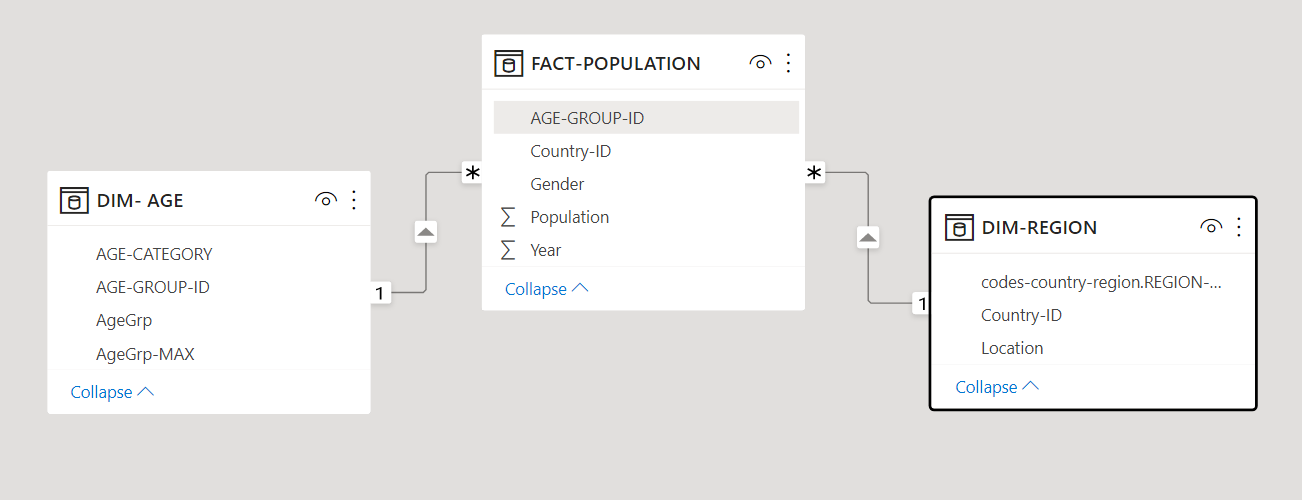

Region Table which contains all the region related information 

In [ ]:
Region = population[['LocID', 'Location']]

In [ ]:
Region

,LocID,Location
0,4.0,Afghanistan
1,8.0,Albania
2,12.0,Algeria
3,24.0,Angola
4,28.0,Antigua and Barbuda
...,...,...
1262053,548.0,Vanuatu
1262054,548.0,Vanuatu
1262055,548.0,Vanuatu
1262056,548.0,Vanuatu


In [ ]:
df = pd.read_fwf('/content/codes-country-region.txt',delimiter = '\t')

In [ ]:
z = df['a-2\ta-3\t#\tName'].str.split('\t', expand = True)
z

,0,1,2,3
0,AF,AFG,004,"Afghanistan, Islamic Republic of"
1,AL,ALB,008,"Albania, Republic of"
2,AQ,ATA,010,Antarctica (the territory South of 60 deg S)
3,DZ,DZA,012,"Algeria, People's Democratic Republic of"
4,AS,ASM,016,American Samoa
...,...,...,...,...
259,XE,null,null,Iraq-Saudi Arabia Neutral Zone
260,XD,null,null,United Nations Neutral Zone
261,XS,null,null,Spratly Islands
262,ZZ,None,None,None


In [ ]:
df['LocID'] = z[2]
df['Country'] = z[3]

In [ ]:
df = df.drop(columns= ['a-2\ta-3\t#\tName'])

In [ ]:
df['CC'] = df['CC'].fillna('NA')

In [ ]:
continent  = df['CC'].unique()
continent

array(['AS', 'EU', 'AN', 'AF', 'OC', 'NA', 'SA', 'ZZ'], dtype=object)

In [ ]:
continent = pd.DataFrame(continent, index= [0,1,2,3,4,5,6,7])

In [ ]:
continent['CONTINENT'] = ['ASIA', 'EUROPE', 'ANTARTICA', 'AFRICA', 'OCEANIA', 'NORTH AMERICA', 'SOUTH AMERICA', 'ZZ']

In [ ]:
continent

,0,CONTINENT
0,AS,ASIA
1,EU,EUROPE
2,AN,ANTARTICA
3,AF,AFRICA
4,OC,OCEANIA
5,NA,NORTH AMERICA
6,SA,SOUTH AMERICA
7,ZZ,ZZ


In [ ]:
df = df.rename(columns = {'CC' : 'Continent-Code'})

In [ ]:
continent = continent.rename(columns = {0 : 'Continent-Code'})

In [ ]:
continent

,Continent-Code,CONTINENT
0,AS,ASIA
1,EU,EUROPE
2,AN,ANTARTICA
3,AF,AFRICA
4,OC,OCEANIA
5,NA,NORTH AMERICA
6,SA,SOUTH AMERICA
7,ZZ,ZZ


Now we will join DF data frame and continent 

In [ ]:
result = pd.merge(df, continent, how = 'left', on ='Continent-Code' )

In [ ]:
result.drop_duplicates(subset=['LocID'], inplace= True)

In [ ]:
Region.drop_duplicates(subset = ['LocID'], inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
Region.shape

(199, 2)

In [ ]:
result['LocID'] = pd.to_numeric(result['LocID'], errors = 'coerce')

In [ ]:
dim_region = pd.merge(Region, result, on = 'LocID', how ='left')

In [ ]:
dim_region = dim_region.drop(columns = ['Country','Continent-Code'])

In [ ]:
dim_region

,LocID,Location,CONTINENT
0,4.0,Afghanistan,ASIA
1,8.0,Albania,EUROPE
2,12.0,Algeria,AFRICA
3,24.0,Angola,AFRICA
4,28.0,Antigua and Barbuda,NORTH AMERICA
...,...,...,...
194,862.0,Venezuela (Bolivarian Republic of),SOUTH AMERICA
195,704.0,Viet Nam,ASIA
196,887.0,Yemen,ASIA
197,894.0,Zambia,AFRICA


## Now we will create DIM-AGE table 

In [ ]:
population.head()

,LocID,Location,Time,AgeGrp,Gender,Population
0,4.0,Afghanistan,1950.0,0-4,Male,630.044
1,8.0,Albania,1950.0,0-4,Male,93.940
2,12.0,Algeria,1950.0,0-4,Male,715.107
3,24.0,Angola,1950.0,0-4,Male,368.476
4,28.0,Antigua and Barbuda,1950.0,0-4,Male,3.553


This is to replace some values into Age Group

In [ ]:
population['AgeGrp'] = population['AgeGrp'].replace('9-May', '5-9')
population['AgeGrp'] = population['AgeGrp'].replace('14-Oct', '10-14')
population['AgeGrp'].unique()

array(['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39',
       '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74',
       '75-79', '80-84', '85-89', '90-94', '95-99', '100+'], dtype=object)

In [ ]:
dim_age = population[['AgeGrp']].drop_duplicates()

In [ ]:
dim_age = dim_age.reset_index(drop = True)

In [ ]:
dim_age['Age-Group-ID'] = dim_age.index

In [ ]:
dim_age

,AgeGrp,Age-Group-ID
0,0-4,0
1,5-9,1
2,10-14,2
3,15-19,3
4,20-24,4
5,25-29,5
6,30-34,6
7,35-39,7
8,40-44,8
9,45-49,9


In [ ]:
dim_age['AgeGrp'].str.split('-',expand = True)[1]

0        4
1        9
2       14
3       19
4       24
5       29
6       34
7       39
8       44
9       49
10      54
11      59
12      64
13      69
14      74
15      79
16      84
17      89
18      94
19      99
20    None
Name: 1, dtype: object

In [ ]:
dim_age['Age-Group-Max'] = dim_age['AgeGrp'].str.split('-',expand = True)[1].fillna(100)

In [ ]:
dim_age['Age-Group-Max'] = dim_age['Age-Group-Max'].astype(int)

In [ ]:
conditions = [
    (dim_age['Age-Group-Max'] <= 4),
    (dim_age['Age-Group-Max'] <= 14),
    (dim_age['Age-Group-Max'] <= 24),
    (dim_age['Age-Group-Max'] <= 39),
    (dim_age['Age-Group-Max'] <= 59),
    (dim_age['Age-Group-Max'] > 59),
]
values = ['baby', 'child', 'teenager', 'youth', 'adult', 'senior']
dim_age['Age-Group_category'] = np.select(conditions, values)
dim_age

,AgeGrp,Age-Group-ID,Age-Group-Max,Age-Group_category
0,0-4,0,4,baby
1,5-9,1,9,child
2,10-14,2,14,child
3,15-19,3,19,teenager
4,20-24,4,24,teenager
5,25-29,5,29,youth
6,30-34,6,34,youth
7,35-39,7,39,youth
8,40-44,8,44,adult
9,45-49,9,49,adult


Now We will create a fact table 

In [ ]:
fact_population = population.copy()

In [ ]:
fact_population = pd.merge(population, dim_age, how = 'left', on ='AgeGrp' )

In [ ]:
fact_population = fact_population.drop(columns = ['Location', 'AgeGrp', 'Age-Group-Max', 'Age-Group_category'])

Now the Star schema is completed with three tables

In [ ]:
print(fact_population.sample(5))
print(dim_region.head())
print(dim_age.head())

         LocID    Time  Gender  Population  Age-Group-ID
530229   400.0  2035.0    Male     265.153            11
1149148  508.0  2056.0  Female    1917.163             9
1007191  262.0  2095.0    Male      21.645            16
1242816  231.0  2095.0  Female     399.005            19
574176   231.0  2014.0    Male     268.960            15
   LocID             Location      CONTINENT
0    4.0          Afghanistan           ASIA
1    8.0              Albania         EUROPE
2   12.0              Algeria         AFRICA
3   24.0               Angola         AFRICA
4   28.0  Antigua and Barbuda  NORTH AMERICA
  AgeGrp  Age-Group-ID  Age-Group-Max Age-Group_category
0    0-4             0              4               baby
1    5-9             1              9              child
2  10-14             2             14              child
3  15-19             3             19           teenager
4  20-24             4             24           teenager


In [ ]:
fact_population['Population'] = fact_population['Population']* 1000

In [ ]:
fact_population.head()

,LocID,Time,Gender,Population,Age-Group-ID
0,4.0,1950.0,Male,630044.0,0
1,8.0,1950.0,Male,93940.0,0
2,12.0,1950.0,Male,715107.0,0
3,24.0,1950.0,Male,368476.0,0
4,28.0,1950.0,Male,3553.0,0
